In [41]:
PROVIDE_OWN_INPUT = False

In [42]:
from google.colab import files
files.upload()

Saving dataset5.csv to dataset5.csv


{'dataset5.csv': b'Company Name,Net Sales,Cons PAT,Cons OCF,OCF/PAT,PBIDTM (%),PATM (%),FR_Dividend Pay Out Ratio(%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Free Float,Ev/EBITDA,M/Sales\r\n3I Infotech Ltd.,1344.00,-976.00,-51.00,0.05,13.18,-72.62,0.00,0.00,-27.87,0.43,-4.74,42.81,13.96,0.34\r\n3M India Ltd.,1840.00,108.00,177.00,1.64,11.32,5.62,0.00,14.38,20.53,1.34,0.02,12.66,30.72,2.28\r\nAavas Financiers Ltd.,104.00,19.00,-370.00,-19.37,79.78,18.40,0.00,24.33,13.44,0.16,6.94,0.00,9.55,0.00\r\nABB India Ltd.,7733.00,229.00,479.00,2.10,7.23,2.80,34.31,8.33,14.73,0.85,0.13,14.15,0.00,0.00\r\nAbbott India Ltd.,2289.00,229.00,215.00,0.94,15.53,9.88,28.77,26.54,39.98,1.13,0.00,18.45,10.30,1.64\r\nAccelya Solutions India Ltd.,303.00,67.00,66.00,0.98,39.81,22.26,79.73,60.01,95.47,0.98,0.00,23.33,0.00,0.00\r\nAegis Logistics Ltd.,3916.00,103.00,122.00,1.18,4.74,2.87,24.22,28.89,26.32,4.30,0.51,23.11,6.09,0.11\r\nAGC Networks Ltd.,891.00,15.00,28.00,1.89,3.23,1.66,0.00,18.39,1

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
data = pd.read_csv('dataset5.csv')

In [45]:
data.head(20)

,Company Name,Net Sales,Cons PAT,Cons OCF,OCF/PAT,PBIDTM (%),PATM (%),FR_Dividend Pay Out Ratio(%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Free Float,Ev/EBITDA,M/Sales
0,3I Infotech Ltd.,1344.0,-976.0,-51.0,0.05,13.18,-72.62,0.00,0.00,-27.87,0.43,-4.74,42.81,13.96,0.34
1,3M India Ltd.,1840.0,108.0,177.0,1.64,11.32,5.62,0.00,14.38,20.53,1.34,0.02,12.66,30.72,2.28
2,Aavas Financiers Ltd.,104.0,19.0,-370.0,-19.37,79.78,18.40,0.00,24.33,13.44,0.16,6.94,0.00,9.55,0.00
3,ABB India Ltd.,7733.0,229.0,479.0,2.10,7.23,2.80,34.31,8.33,14.73,0.85,0.13,14.15,0.00,0.00
4,Abbott India Ltd.,2289.0,229.0,215.0,0.94,15.53,9.88,28.77,26.54,39.98,1.13,0.00,18.45,10.30,1.64
5,Accelya Solutions India Ltd.,303.0,67.0,66.0,0.98,39.81,22.26,79.73,60.01,95.47,0.98,0.00,23.33,0.00,0.00
6,Aegis Logistics Ltd.,3916.0,103.0,122.0,1.18,4.74,2.87,24.22,28.89,26.32,4.30,0.51,23.11,6.09,0.11
7,AGC Networks Ltd.,891.0,15.0,28.0,1.89,3.23,1.66,0.00,18.39,15.58,0.96,1.44,19.10,-1.57,0.18
8,Agro Tech Foods Ltd.,760.0,37.0,41.0,1.11,8.01,4.86,13.20,12.38,14.48,1.90,0.08,25.60,17.72,1.61
9,Akzo Nobel India Ltd.,2527.0,186.0,155.0,0.83,11.66,6.66,50.13,21.11,31.33,1.46,0.00,11.14,16.57,1.73


In [46]:
test = data.iloc[:,:]

In [47]:
data = data.replace( ' -   ', np.nan)

In [48]:
data.dtypes

Company Name                     object
Net Sales                       float64
Cons PAT                        float64
Cons OCF                        float64
OCF/PAT                         float64
PBIDTM (%)                      float64
PATM (%)                        float64
FR_Dividend Pay Out Ratio(%)    float64
ROE (%)                         float64
ROCE (%)                        float64
Asset Turnover(x)               float64
Total Debt/Equity(x)            float64
Free Float                      float64
Ev/EBITDA                       float64
M/Sales                         float64
dtype: object

In [49]:
#data.drop(labels='Company Name', axis=1, inplace=True)

In [50]:
data.iloc[:,1:] = data.iloc[:,1:].astype('float64')

In [51]:
data.fillna(data.mean(), inplace=True)

In [52]:
len(data.columns)

15

# **Ev/EBITDA Prediction**

In [53]:
data1 = data.iloc[:,:-1 ]

In [54]:
data1.head()


,Company Name,Net Sales,Cons PAT,Cons OCF,OCF/PAT,PBIDTM (%),PATM (%),FR_Dividend Pay Out Ratio(%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Free Float,Ev/EBITDA
0,3I Infotech Ltd.,1344.0,-976.0,-51.0,0.05,13.18,-72.62,0.00,0.00,-27.87,0.43,-4.74,42.81,13.96
1,3M India Ltd.,1840.0,108.0,177.0,1.64,11.32,5.62,0.00,14.38,20.53,1.34,0.02,12.66,30.72
2,Aavas Financiers Ltd.,104.0,19.0,-370.0,-19.37,79.78,18.40,0.00,24.33,13.44,0.16,6.94,0.00,9.55
3,ABB India Ltd.,7733.0,229.0,479.0,2.10,7.23,2.80,34.31,8.33,14.73,0.85,0.13,14.15,0.00
4,Abbott India Ltd.,2289.0,229.0,215.0,0.94,15.53,9.88,28.77,26.54,39.98,1.13,0.00,18.45,10.30


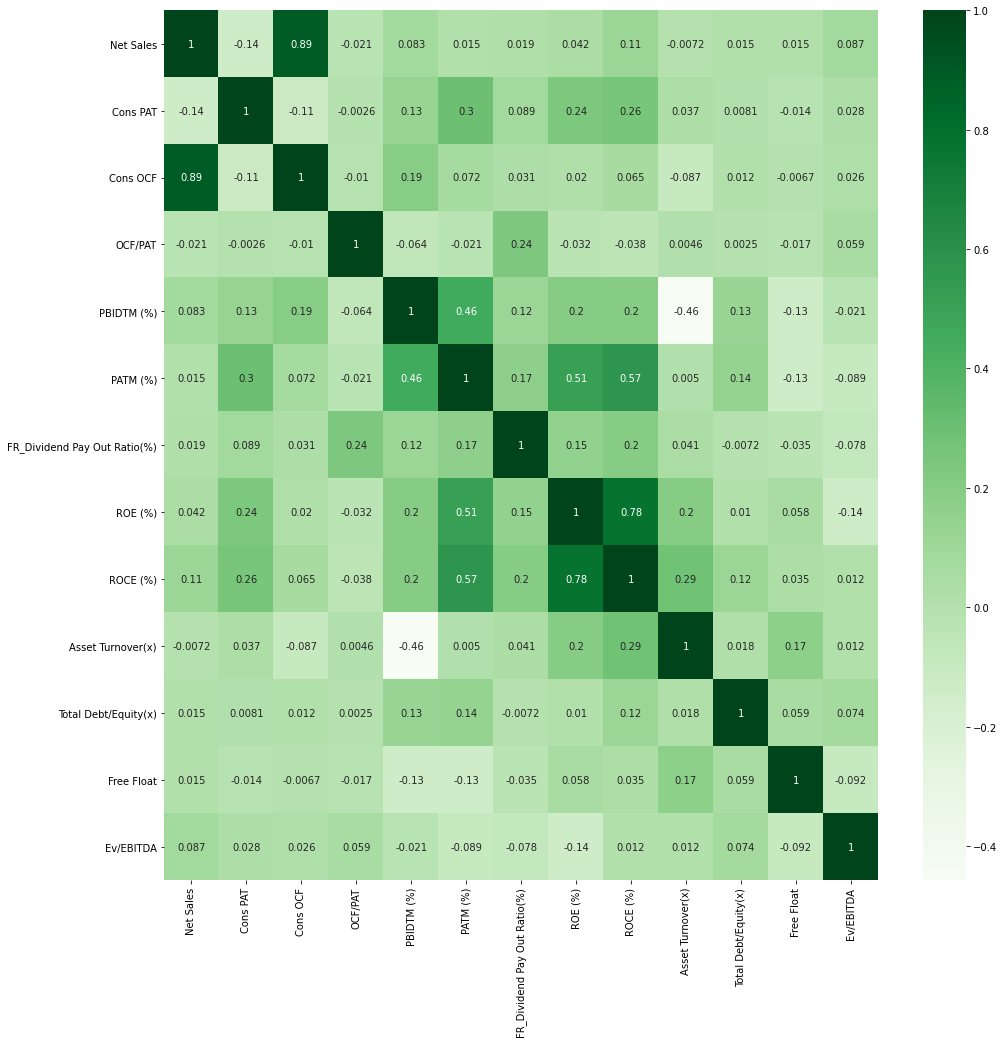

In [55]:
plt.figure(figsize=(16,16))
cor = data1.corr()
sns.heatmap(cor, annot=True, cmap='Greens')
plt.show()

## Selecting most important features:

In [56]:
cor_target = abs(cor["Ev/EBITDA"])
cor_target.sort_values(ascending=False)[:6]
#print(list(cor_target.index))

Ev/EBITDA                       1.000000
ROE (%)                         0.140139
Free Float                      0.092247
PATM (%)                        0.089485
Net Sales                       0.086527
FR_Dividend Pay Out Ratio(%)    0.078437
Name: Ev/EBITDA, dtype: float64

In [57]:
X,y = data1[['Net Sales', 'PATM (%)', 'ROE (%)', 'Free Float',
       'FR_Dividend Pay Out Ratio(%)']], data1['Ev/EBITDA']

In [58]:
from sklearn.model_selection import train_test_split
if PROVIDE_OWN_INPUT:
    X_test =  pd.read_csv('test_data.csv')
    X_train,y_train = X,y
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [59]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=5),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR']
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

### Mean Squared Error
> Lower the value of error, better the performance

In [60]:
from sklearn.metrics import mean_squared_error
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.10f}'.format(i,r, mean_squared_error(y_test.values, p),))

 0 LassoCV                 119.3100599050
 1 XGBRegressor            173.7190957410
 2 RidgeCV                 199.7968877713
 3 BayesianRidge           148.6753191142
 4 ARDRegression           128.5695465129
 5 ElasticNetCV            148.8990563711
 6 LassoLarsCV             119.3100599050
 7 SVR                     119.2899024219


### R2 Score
> Higher the score, better the model. A perfect model willl have the highest value(i.e 1).

In [61]:
from sklearn.metrics import r2_score
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, r2_score(y_test.values, p)))

 0 LassoCV                 -0.00158
 1 XGBRegressor            -0.45834
 2 RidgeCV                 -0.67725
 3 BayesianRidge           -0.24810
 4 ARDRegression           -0.07931
 5 ElasticNetCV            -0.24998
 6 LassoLarsCV             -0.00158
 7 SVR                     -0.00141


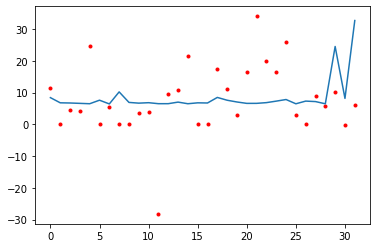

In [62]:
if PROVIDE_OWN_INPUT:
    plt.plot(range(y_train.shape[0]),y_train,'.r')
else:
    plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred_list[3]))], pred_list[3])

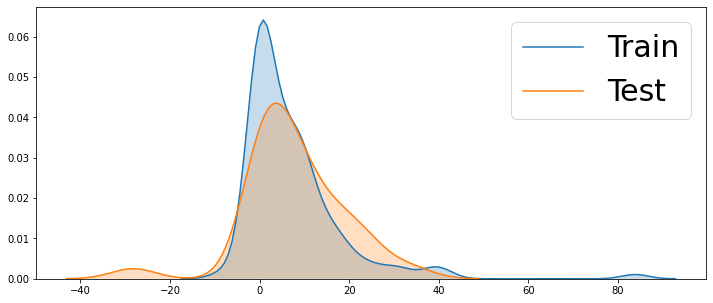

In [63]:
plt.subplots(figsize=(12,5))
sns.kdeplot(y_train, shade=True, label='Train')
sns.kdeplot(y_test, shade = True, label= 'Test')
plt.legend( prop={'size': 30})

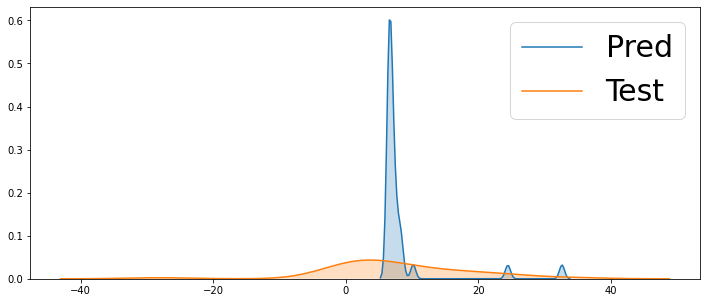

In [64]:
plt.subplots(figsize=(12,5))
sns.kdeplot(pred_list[3], shade=True, label='Pred')
sns.kdeplot(y_test, shade = True, label= 'Test')
plt.legend( prop={'size': 30})

# **M/Sales Prediction**

In [65]:
data2 = data.iloc[:,: ].drop('Ev/EBITDA', axis=1)

In [66]:
data2.head()

,Company Name,Net Sales,Cons PAT,Cons OCF,OCF/PAT,PBIDTM (%),PATM (%),FR_Dividend Pay Out Ratio(%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Free Float,M/Sales
0,3I Infotech Ltd.,1344.0,-976.0,-51.0,0.05,13.18,-72.62,0.00,0.00,-27.87,0.43,-4.74,42.81,0.34
1,3M India Ltd.,1840.0,108.0,177.0,1.64,11.32,5.62,0.00,14.38,20.53,1.34,0.02,12.66,2.28
2,Aavas Financiers Ltd.,104.0,19.0,-370.0,-19.37,79.78,18.40,0.00,24.33,13.44,0.16,6.94,0.00,0.00
3,ABB India Ltd.,7733.0,229.0,479.0,2.10,7.23,2.80,34.31,8.33,14.73,0.85,0.13,14.15,0.00
4,Abbott India Ltd.,2289.0,229.0,215.0,0.94,15.53,9.88,28.77,26.54,39.98,1.13,0.00,18.45,1.64


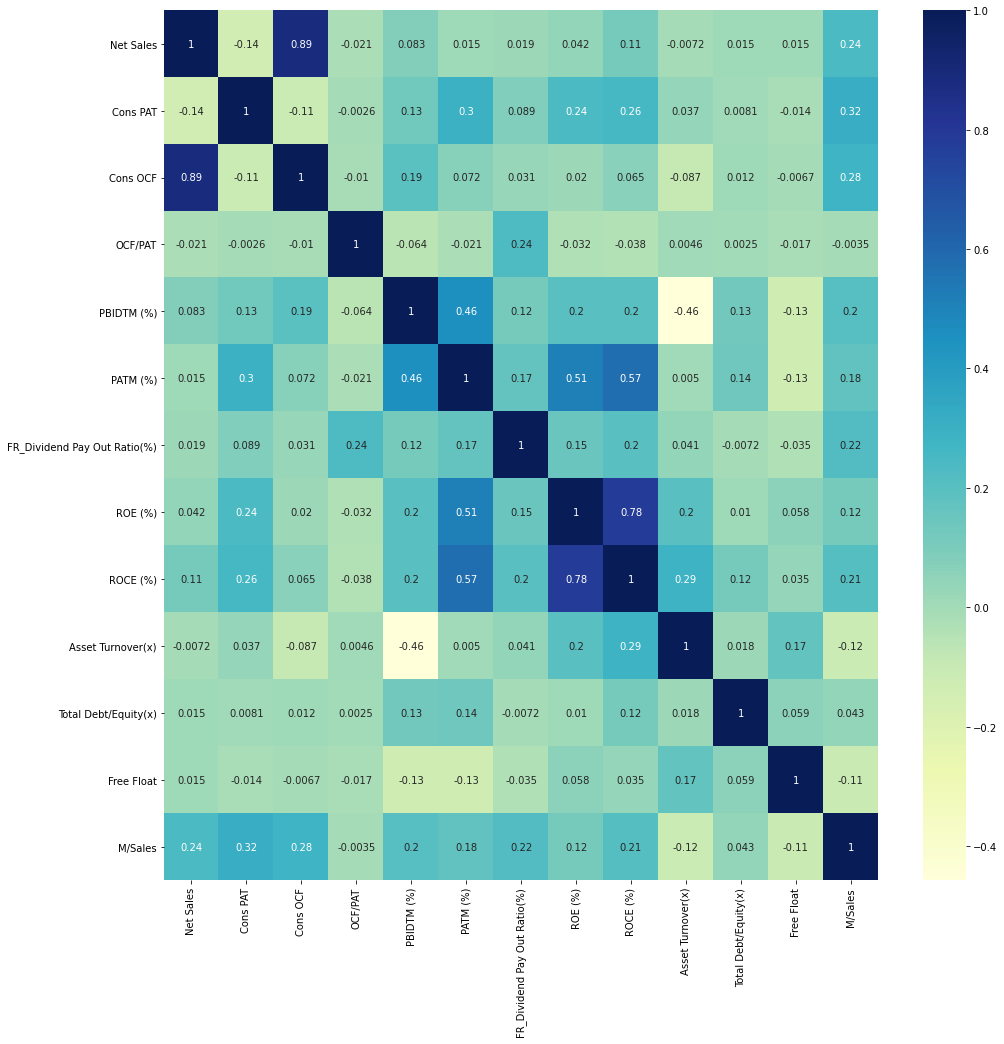

In [67]:
plt.figure(figsize=(16,16))
cor = data2.corr()
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

In [68]:
cor_target = abs(cor["M/Sales"])
cor_target.sort_values(ascending=False)[:6]

M/Sales                         1.000000
Cons PAT                        0.316766
Cons OCF                        0.277223
Net Sales                       0.237388
FR_Dividend Pay Out Ratio(%)    0.223798
ROCE (%)                        0.214393
Name: M/Sales, dtype: float64

In [69]:
X,y = data2[['Cons PAT', 'Cons OCF', 'Net Sales', 'ROCE (%)',
       'FR_Dividend Pay Out Ratio(%)']], data2['M/Sales']

In [70]:
from sklearn.model_selection import train_test_split
if PROVIDE_OWN_INPUT:
    X_test =  pd.read_csv('test_data.csv')
    X_train,y_train = X,y
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [71]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=5),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=10),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR',]
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

### Mean Squared Error
> Lower the value of error, better the performance

In [72]:
from sklearn.metrics import mean_squared_error
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, round(mean_squared_error(y_test.values, p)**0.5,5),))

 0 LassoCV                 1.72938
 1 XGBRegressor            1.68069
 2 RidgeCV                 1.68171
 3 BayesianRidge           1.70485
 4 ARDRegression           1.53680
 5 ElasticNetCV            1.72946
 6 LassoLarsCV             1.57203
 7 SVR                     1.53588


### R2 Score
> Higher the score, better the model. A perfect model willl have the highest value(i.e 1).

In [73]:
from sklearn.metrics import r2_score
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, r2_score(y_test.values, p)))

 0 LassoCV                 -0.26807
 1 XGBRegressor            -0.19768
 2 RidgeCV                 -0.19913
 3 BayesianRidge           -0.23235
 4 ARDRegression           -0.00138
 5 ElasticNetCV            -0.26820
 6 LassoLarsCV             -0.04782
 7 SVR                     -0.00019


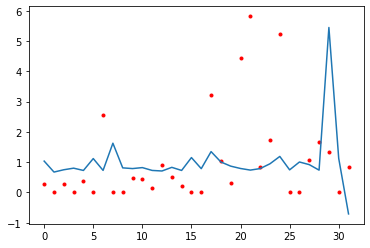

In [74]:
if PROVIDE_OWN_INPUT:
    plt.plot(range(y_train.shape[0]),y_train,'.r')
else:
    plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred_list[3]))], pred_list[5])

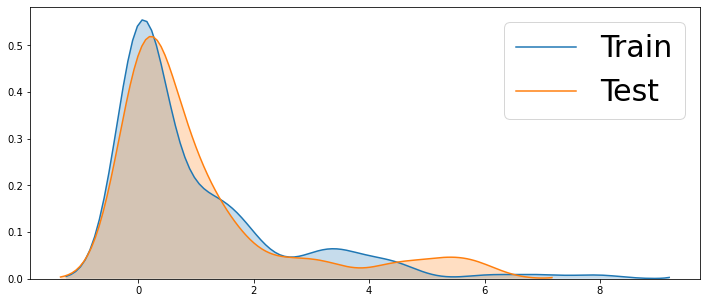

In [75]:
plt.subplots(figsize=(12,5))
sns.kdeplot(y_train, shade=True, label='Train')
sns.kdeplot(y_test, shade = True, label= 'Test')
plt.legend( prop={'size': 30})

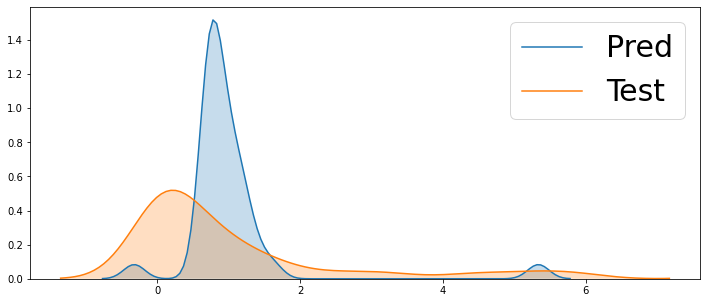

In [76]:

plt.subplots(figsize=(12,5))
sns.kdeplot(pred_list[3], shade=True, label='Pred')
sns.kdeplot(y_test, shade = True, label= 'Test')
plt.legend( prop={'size': 30})